In [2]:
import os
from glob import glob
import shutil

import re

from show_annotation import imgTxtCheck

# 이미지 확장자를 jpg로 변환

In [40]:
# .이후의 확장자를 
p1 = re.compile(r'(?<=[.]).+')
#
p2 = re.compile(r'(?P<start>.*)(?P<확장자>(?<=[.]).+)')

def 확장자_체크(path):
    
    for (path, dir, files) in os.walk(path):
        for file in files:
            확장자 = p1.search(file).group()
            if 확장자 not in ['txt', 'jpg']:
                change = p2.sub("\g<start>"+'jpg', file)
                
                change_path = os.path.join(path, change)
                origin_path = os.path.join(path, file)
                
                os.rename(origin_path, change_path)

In [41]:
path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case1-KFood_edited'

확장자_체크(path)

# 1.norm_Center


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/KFood_edited/259/kfood_259_30000001.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/KFood_edited/259/kfood_259_30000001.txt

img,txt 파일 존재 확인
Normalization 완료
label:  쌀밥

box 내용:  [[581.0, 558.0, 562.0, 351.0, '쌀밥'], [300.0, 382.5, 562.0, 351.0, '쌀밥']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_쌀밥.png


('./좌표확인_쌀밥.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_쌀밥.png',
 [[581.0, 558.0, 562.0, 351.0, '쌀밥'], [300.0, 382.5, 562.0, 351.0, '쌀밥']],
 True)

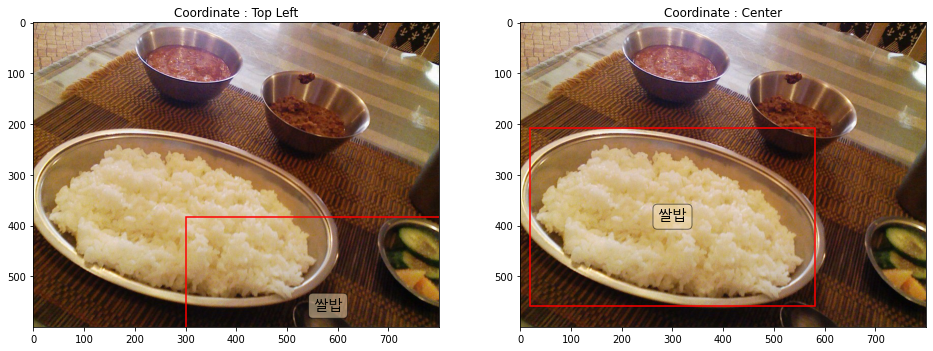

In [95]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/KFood_edited/259/kfood_259_30000001.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/KFood_edited/259/kfood_259_30000001.txt'

imgTxtCheck(img, txt)

In [234]:
'''
구현 완료

'''


# KFood_edited 
# 260 ~ 333 까지 클래스에서 kfood_*.txt 로 되어있는 텍스트 파일들은 이미 normalization까지 다 되어 있음...
# 근데 KFood_edited엔 366까지 있다.


p = re.compile('[^ ,]+')

def norm_Center(in_path, out_path):
    
    확장자_체크(in_path)
    
    for (path, dir, files) in os.walk(in_path):

        for filename in files:
            
            ext = os.path.splitext(filename)[-1]               

            if ext == '.txt':
                
                txt_path = os.path.join(path, filename) 
            
                with open(txt_path, 'r', encoding='UTF-8') as f:
                    txts = f.readlines()
                    #print(txts)
                    
                    class_compare = ''
                    save_folder = 'single'
                    
                    for i, txt in enumerate(txts):
                        #print('내용: ',txt)
                        
                        txt = txt.strip()
                        m = p.findall(txt)
                        #print(m)
                       
                        class_num = m[0]
                        
                        if (i > 0) and (class_num != class_compare):
                            save_folder = 'multi'
                        class_compare = class_num
                        

                    if save_folder == 'single':
                        out = os.path.join(out_path, save_folder, class_num)
            
                        if not os.path.exists(out):
                            os.makedirs(out)
                        
                    elif save_folder == 'multi':
                        out = os.path.join(out_path, save_folder)
            
                        if not os.path.exists(out):
                            os.makedirs(out)
                    
                    # txt 복사 이동
                    shutil.copy(txt_path, out)
                    
                    # jpg 복사 이동
                    img_path = txt_path[:-3]+'jpg'
                    #print("img_path:", img_path)
                    shutil.copy(img_path, out)

# 2.norm_TopLeft

In [105]:
'''띄어쓰기와 ,이외의 값을 잡는다.'''
p = re.compile('[^ ,]+')

def norm_TopLeft(in_path, out_path):
    '''
    input:
    in_path-txt 변경을 원하는 최상위 폴더
    out_path-변경된 txt를 저장할 폴더
    
    output:
    없음
    '''
    
    
    '''
    class_dic2.txt를 딕셔너리로 가져오기
    키: 음식이름, 벨류: 숫자
    '''
    class_dic2 = {}
    f = open('./class_dic2.txt','r')
    while True:
        line = f.readline()
        if not line : break
        class_dic2[line.split(':')[0]] = line.split(':')[1][:-1]
    f.close()
    
    '''walk()로 txt를 다 잡는다.'''
    for (path, dir, files) in os.walk(in_path):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext == '.txt':
                txt_path = os.path.join(path, filename)
                #print(path.split('/')[-1])
                
                with open(txt_path, 'r', encoding='UTF-8') as f:
                    txts = f.readlines()
                    
                    f = open(os.path.join(out_path, filename), "w")
                    for txt in txts:
                        #print('내용: ',txt)
                        
                        txt = txt.strip()
                        m = p.findall(txt)
                        #print(m)
                        
                        '''
                        topLeft -> center 변환 공식
                        x_c(enter), y_c(enter)               
                        w_b(ounding box), h_b(ounding box)
                        '''
                        x_c = float(m[1])+float(m[3])/2
                        y_c = float(m[2])+float(m[4])/2
                
                        w_b = float(m[3])
                        h_b = float(m[4])
                        
                        class_num = class_dic2.get(m[0], path.split('/')[-1])
                        
                        #print('x_c, y_c, w, h, class_num: ', x_c, y_c, w, h, class_num)
                        
                        t = []
                        t.insert(0, str(class_num))
                        t.insert(1, str(round(x_c, 6)))
                        t.insert(2, str(round(y_c, 6)))
                        t.insert(3, str(round(w_b, 6)))
                        t.insert(4, str(round(h_b, 6)))
                        print('변환 결과: ', t)
                        print('================================')
                        f.write(' '.join(t) + '\n')
                    f.close()

# 3.center


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.txt

img,txt 파일 존재 확인
Normalization 안됨
label:  CU_12찬_한판_도시락

box 내용:  [[2654.0, 3730.0, 2168.0, 3409.0, 'CU_12찬_한판_도시락'], [1570.0, 2025.5, 2168.0, 3409.0, 'CU_12찬_한판_도시락']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_CU_12찬_한판_도시락.png


('./좌표확인_CU_12찬_한판_도시락.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_CU_12찬_한판_도시락.png',
 [[2654.0, 3730.0, 2168.0, 3409.0, 'CU_12찬_한판_도시락'],
  [1570.0, 2025.5, 2168.0, 3409.0, 'CU_12찬_한판_도시락']],
 False)

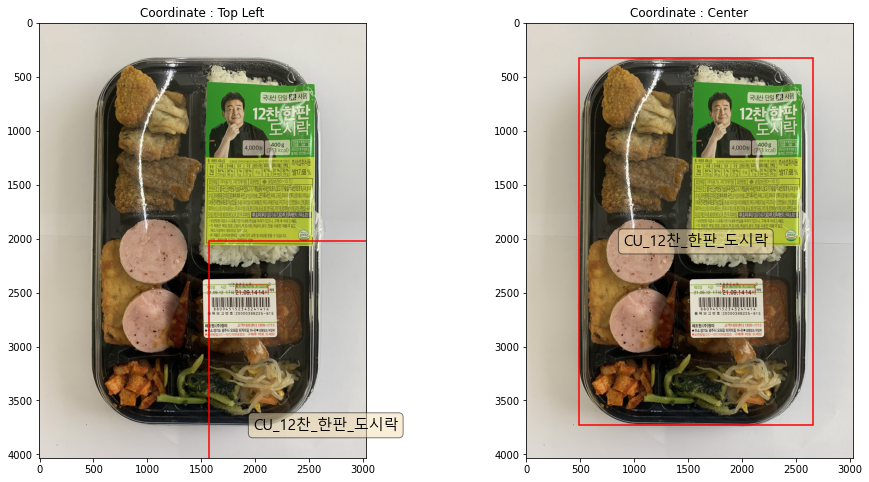

In [96]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.txt'

imgTxtCheck(img, txt)

In [106]:
p = re.compile('[^ ,]+')

def center(in_path, out_path):

    
    # class_dic2.txt를 딕셔너리로 가져오기
    class_dic2 = {}
    f = open('./class_dic2.txt','r')
    while True:
        line = f.readline()
        if not line : break
        class_dic2[line.split(':')[0]] = line.split(':')[1][:-1]
    f.close()
    
    
    for (path, dir, files) in os.walk(in_path):
        for filename in files:
            ext = os.path.splitext(filename)[-1]
            if ext == '.txt':
                txt_path = os.path.join(path, filename)
                #print(path.split('/')[-1])
                
                with open(txt_path, 'r', encoding='UTF-8') as f:
                    txts = f.readlines()
                    
                    f = open(os.path.join(out_path, filename), "w")
                    for txt in txts:
                        #print('내용: ',txt)
                        
                        txt = txt.strip()
                        m = p.findall(txt)
                        #print(m)
                        
                        '''
                        center는 그냥 image w,h로 나누면 된다.
                        '''
                        x_c = float(m[2])/float(m[0])
                        y_c = float(m[3])/float(m[1])
                
                        w_b = float(m[4])/float(m[0])
                        h_b = float(m[5])/float(m[1])
                        
                        class_num = class_dic2.get(m[6], path.split('/')[-1])
                        
                        #print('x_c, y_c, w, h, class_num: ', x_c, y_c, w, h, class_num)
                        
                        t = []
                        t.insert(0, str(class_num))
                        t.insert(1, str(round(x_c, 6)))
                        t.insert(2, str(round(y_c, 6)))
                        t.insert(3, str(round(w_b, 6)))
                        t.insert(4, str(round(h_b, 6)))
                        print('변환 결과: ', t)
                        print('================================')
                        f.write(' '.join(t) + '\n')
                    f.close()

In [107]:
in_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox'
out_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output'

center(in_path, out_path)

변환 결과:  ['1', '0.51918', '0.502356', '0.716931', '0.845486']
변환 결과:  ['1', '0.509188', '0.520537', '0.765857', '0.630332']
변환 결과:  ['10', '0.490667', '0.514', '0.957333', '0.505']
변환 결과:  ['10', '0.484', '0.51675', '0.956', '0.5025']



img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/dki_CU_12찬 한판 도시락_1_900006.txt

img,txt 파일 존재 확인
Normalization 완료
label:  가자미구이

box 내용:  [[2653.999992, 3729.999168, 2167.999344, 3408.9995519999998, '가자미구이'], [1570.0003199999999, 2025.4993920000002, 2167.999344, 3408.9995519999998, '가자미구이']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_가자미구이.png


('./좌표확인_가자미구이.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_가자미구이.png',
 [[2653.999992, 3729.999168, 2167.999344, 3408.9995519999998, '가자미구이'],
  [1570.0003199999999,
   2025.4993920000002,
   2167.999344,
   3408.9995519999998,
   '가자미구이']],
 True)

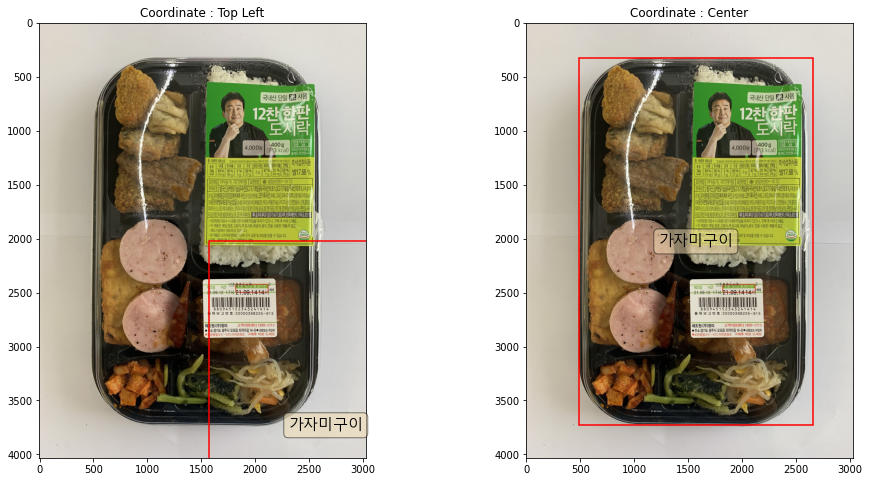

In [108]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/LunchBox/data/1/dki_CU_12찬 한판 도시락_1_900006.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/dki_CU_12찬 한판 도시락_1_900006.txt'

imgTxtCheck(img, txt)

# 4.topLeft


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.txt

img,txt 파일 존재 확인
Normalization 안됨
label:  갈비구이

box 내용:  [[291.0, 204.5, 420.0, 247.0, '갈비구이'], [81.0, 81.0, 420.0, 247.0, '갈비구이']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_갈비구이.png


('./좌표확인_갈비구이.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_갈비구이.png',
 [[291.0, 204.5, 420.0, 247.0, '갈비구이'], [81.0, 81.0, 420.0, 247.0, '갈비구이']],
 False)

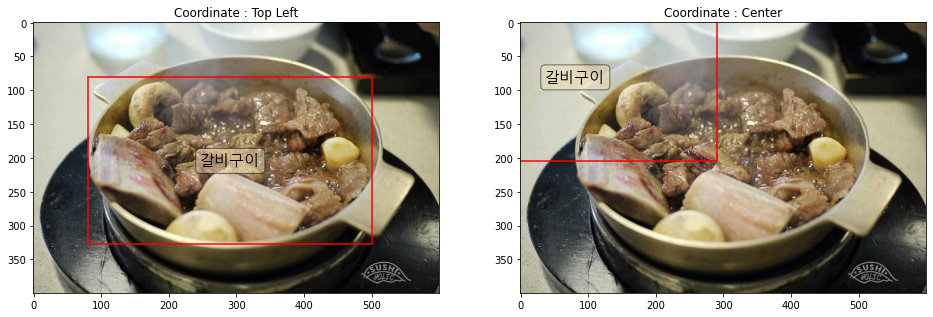

In [38]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.txt'

imgTxtCheck(img, txt)

In [230]:
'''
구현완료

'''

p = re.compile('[^ ,]+')

def topLeft(in_path, out_path):
    
    확장자_체크(in_path)
    
    # class_dic2.txt를 딕셔너리로 가져오기
    class_dic2 = {}
    f = open('./class_dic2.txt','r')
    while True:
        line = f.readline()
        if not line : break
        class_dic2[line.split(':')[0]] = line.split(':')[1][:-1]
    f.close()
    
    
    for (path, dir, files) in os.walk(in_path):

        for filename in files:
            
            ext = os.path.splitext(filename)[-1]
             
            if ext == '.txt':
                
                txt_path = os.path.join(path, filename) 
            
                with open(txt_path, 'r', encoding='UTF-8') as f:
                    txts = f.readlines()
                    #print(txts)
                    
                    t = ''
                    class_compare = ''
                    save_folder = 'single'
                    
                    for i, txt in enumerate(txts):
                        #print('내용: ',txt)
                        
                        txt = txt.strip()
                        m = p.findall(txt)
                        #print(m)
                        
                        x_c = ((float(m[2])*2 + float(m[4]))/2)/float(m[0])
                        y_c = ((float(m[3])*2 + float(m[5]))/2)/float(m[1])
                
                        w_b = float(m[4])/float(m[0])
                        h_b = float(m[5])/float(m[1])
                        
                        class_num = class_dic2.get(m[6], m[6])
                        
                        if (i > 0) and (class_num != class_compare):
                            save_folder = 'multi'
                        class_compare = class_num
                        #print('x_c, y_c, w, h, class_num: ', x_c, y_c, w_b, h_b, class_num)
                        
                        t += str(class_num) + ' '
                        t += str(round(x_c, 6)) + ' '
                        t += str(round(y_c, 6)) + ' '
                        t += str(round(w_b, 6)) + ' '
                        t += str(round(h_b, 6)) + '\n'
                    
                    if save_folder == 'single':
                        out = os.path.join(out_path, save_folder, class_num)
            
                        if not os.path.exists(out):
                            os.makedirs(out)
                        
                    elif save_folder == 'multi':
                        out = os.path.join(out_path, save_folder)
            
                        if not os.path.exists(out):
                            os.makedirs(out)
                    
                    out2 = os.path.join(out, filename)
                    
                    # txt 파일 쓰기
                    with open(out2, 'w', encoding='UTF-8') as f2:
                        f2.write(t)
                    
                    # jpg 복사 이동
                    img_path = txt_path[:-3]+'jpg'
                    #print("img_path:", img_path)
                    shutil.copy(img_path, out)

In [231]:
in_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블'
out_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output'

topLeft(in_path, out_path)

In [232]:
in_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder'
out_path = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output'

topLeft(in_path, out_path)


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/dki_10170044.txt

img,txt 파일 존재 확인
Normalization 완료
label:  갈비구이

box 내용:  [[501.0, 328.0, 420.0, 247.00000000000003, '갈비구이'], [291.0, 204.5, 420.0, 247.00000000000003, '갈비구이']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_갈비구이.png


('./좌표확인_갈비구이.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_갈비구이.png',
 [[501.0, 328.0, 420.0, 247.00000000000003, '갈비구이'],
  [291.0, 204.5, 420.0, 247.00000000000003, '갈비구이']],
 True)

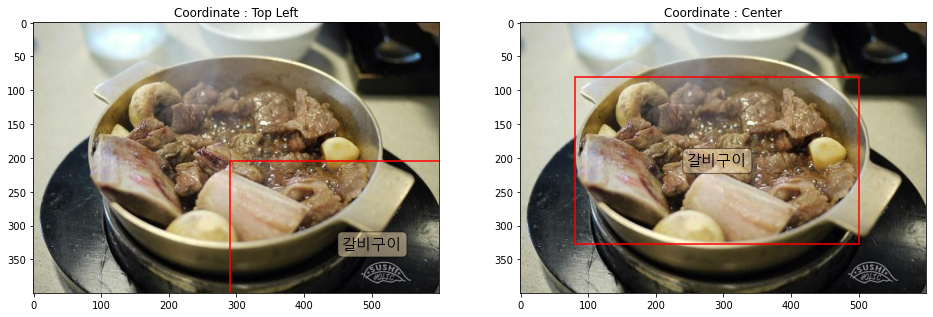

In [111]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/food_detection/RDProject2_folder/갈비구이/dki_10170044.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/dki_10170044.txt'

imgTxtCheck(img, txt)

In [ ]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/multi/dki_muilti_간장게장1_어묵볶음2_315_300015.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/output/multi/dki_muilti_간장게장1_어묵볶음2_315_300015.txt'

imgTxtCheck(img, txt)


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_간장게장1_어묵볶음2_315_300015.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_간장게장1_어묵볶음2_315_300015.txt

img,txt 파일 존재 확인
멀티 레이블이다!
Normalization 안됨
label:  간장게장
Normalization 안됨
label:  어묵볶음

box 내용:  [[259.5, 107.5, 263.0, 155.0, '간장게장'], [128.0, 30.0, 263.0, 155.0, '간장게장'], [78.0, 100.0, 86.0, 58.0, '어묵볶음'], [35.0, 71.0, 86.0, 58.0, '어묵볶음']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_어묵볶음.png


('./좌표확인_어묵볶음.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_어묵볶음.png',
 [[259.5, 107.5, 263.0, 155.0, '간장게장'],
  [128.0, 30.0, 263.0, 155.0, '간장게장'],
  [78.0, 100.0, 86.0, 58.0, '어묵볶음'],
  [35.0, 71.0, 86.0, 58.0, '어묵볶음']],
 False)

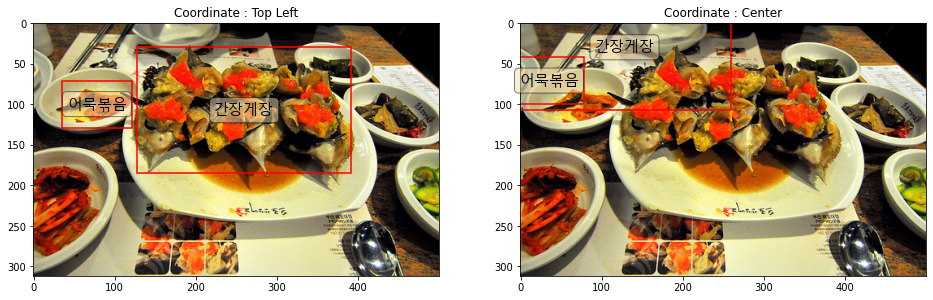

In [33]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_간장게장1_어묵볶음2_315_300015.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_간장게장1_어묵볶음2_315_300015.txt'

imgTxtCheck(img, txt)


img 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_불고기1_배추김치2_267_300052.jpg,
txt 경로: /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_불고기1_배추김치2_267_300052.txt

img,txt 파일 존재 확인
멀티 레이블이다!
Normalization 안됨
label:  불고기
Normalization 안됨
label:  배추김치

box 내용:  [[238.5, 376.5, 361.0, 229.0, '불고기'], [58.0, 262.0, 361.0, 229.0, '불고기'], [188.0, 596.0, 192.0, 140.0, '배추김치'], [92.0, 526.0, 192.0, 140.0, '배추김치']]

좌표확인 이미지 저장 위치:  /data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_배추김치.png


('./좌표확인_배추김치.png',
 '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/좌표확인_배추김치.png',
 [[238.5, 376.5, 361.0, 229.0, '불고기'],
  [58.0, 262.0, 361.0, 229.0, '불고기'],
  [188.0, 596.0, 192.0, 140.0, '배추김치'],
  [92.0, 526.0, 192.0, 140.0, '배추김치']],
 False)

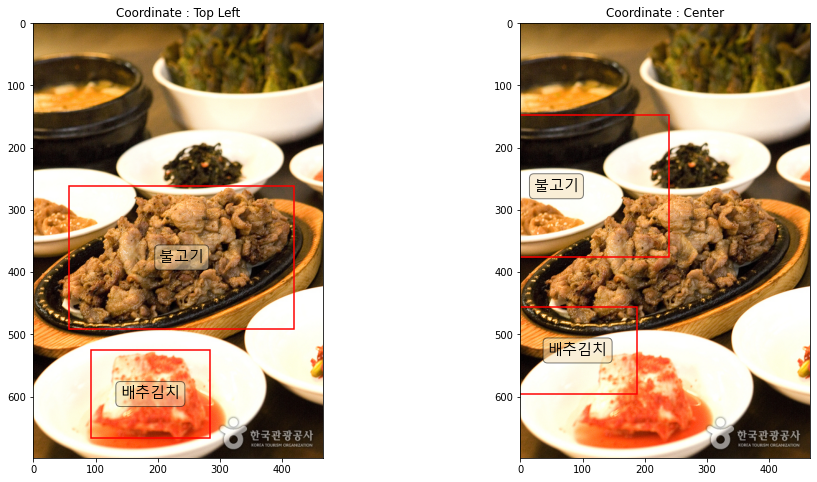

In [36]:
# 시각화

img = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_불고기1_배추김치2_267_300052.jpg'
txt = '/data/FoodDetection/Object_Detection/dataset_backup__/gpu01_도시락/보여주기/data/case8-멀티레이블/dki_muilti_불고기1_배추김치2_267_300052.txt'

imgTxtCheck(img, txt)